In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
#import kaggle_evaluation.mitsui_inference_server
from sklearn import *
import numpy as np
import pandas as pd
#import polars as pl
import os, warnings
warnings.filterwarnings("ignore")

# Data

In [30]:
train = pd.read_csv('train.csv')
trainl = pd.read_csv('train_labels.csv')
traint = pd.read_csv('target_pairs.csv')

In [31]:
trainl = trainl.fillna(0)

In [32]:
target_lag_1 = traint.loc[traint["lag"]==1,"target"].values
target_lag_2 = traint.loc[traint["lag"]==2,"target"].values
target_lag_3 = traint.loc[traint["lag"]==3,"target"].values
target_lag_4 = traint.loc[traint["lag"]==4,"target"].values

In [33]:
Features = [i for i in trainl.columns ]
def creat_lagged_labels(df):
    dt = pd.DataFrame()
    dt["date_id"] = df["date_id"]
    for f in Features[1:]:
        if f in target_lag_1:
            lag = 1
        elif f in target_lag_2:
            lag = 2
        elif f in target_lag_3:
            lag = 3
        elif f in target_lag_4:
            lag = 4    
        dt[f] = df[f].shift(lag).fillna(0)
    return df, dt

In [34]:
_,train_lagged = creat_lagged_labels(trainl)

In [35]:
trainl

,date_id,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0,0.005948,-0.002851,-0.004675,-0.000639,0.000000,0.000000,-0.006729,0.006066,0.000000,...,0.000000,0.021239,-0.005595,0.000000,-0.004628,0.033793,0.000000,0.038234,0.000000,0.027310
1,1,0.005783,-0.024118,-0.007052,-0.018955,-0.031852,-0.019452,0.003002,-0.006876,-0.002042,...,0.003377,0.021372,-0.001517,0.012846,0.010547,0.030527,-0.000764,0.025021,0.003548,0.020940
2,2,0.001048,0.023836,-0.008934,-0.022060,0.000000,0.000000,0.037449,0.007658,0.000000,...,-0.006712,0.009308,0.001857,-0.012761,-0.002345,0.017529,-0.005394,0.004835,-0.009075,0.001706
3,3,0.001700,-0.024618,0.011943,0.004778,0.000000,0.000000,-0.012519,-0.016896,0.000000,...,0.000000,0.036880,-0.015189,0.000000,0.008118,0.001079,0.000000,-0.015102,0.000000,-0.033010
4,4,-0.003272,0.005234,0.006856,0.013312,0.023953,0.010681,-0.011649,0.002019,0.003897,...,0.000000,0.004937,0.000000,-0.006673,-0.016105,-0.004885,0.000000,0.000000,0.009514,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,1912,-0.012596,0.009309,0.007947,0.006477,-0.026216,-0.029487,-0.003287,0.011751,-0.027610,...,0.000000,0.000000,0.000000,0.042052,0.000000,0.000000,0.000000,0.000000,0.031006,0.000000
1913,1913,-0.000736,-0.001292,-0.005137,-0.007961,-0.008494,-0.011547,0.004263,0.005670,-0.004822,...,-0.012992,-0.003349,0.010912,0.006198,-0.009216,-0.003038,-0.026082,-0.008057,-0.002069,-0.141053
1914,1914,-0.002294,0.012898,0.009978,0.001567,0.002596,-0.007373,0.007554,0.002661,0.004083,...,-0.005240,0.004044,0.004459,0.002619,0.001308,-0.006772,-0.019918,-0.013304,-0.005527,-0.127688
1915,1915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.008250,0.012842,0.009076,0.000932,0.011613,0.003825,0.024350,-0.006928,0.006805,-0.012187


In [36]:
train_lagged

,date_id,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.005948,-0.002851,-0.004675,-0.000639,0.000000,0.000000,-0.006729,0.006066,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0.005783,-0.024118,-0.007052,-0.018955,-0.031852,-0.019452,0.003002,-0.006876,-0.002042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.001048,0.023836,-0.008934,-0.022060,0.000000,0.000000,0.037449,0.007658,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,0.001700,-0.024618,0.011943,0.004778,0.000000,0.000000,-0.012519,-0.016896,0.000000,...,0.000000,0.021239,-0.005595,0.000000,-0.004628,0.033793,0.000000,0.038234,0.000000,0.027310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,1912,-0.001049,0.010689,-0.013043,-0.003886,0.016628,0.002027,0.000903,0.013468,0.006847,...,-0.029812,0.013292,-0.044024,-0.002339,0.023029,0.035976,-0.056517,0.017393,0.006221,0.007932
1913,1913,-0.012596,0.009309,0.007947,0.006477,-0.026216,-0.029487,-0.003287,0.011751,-0.027610,...,0.046582,0.025419,-0.030993,0.038743,0.026417,0.030334,0.029837,0.002042,0.032667,-0.015732
1914,1914,-0.000736,-0.001292,-0.005137,-0.007961,-0.008494,-0.011547,0.004263,0.005670,-0.004822,...,0.028187,0.017681,-0.024106,0.051672,0.005058,0.027760,0.017625,0.004573,0.047833,-0.024001
1915,1915,-0.002294,0.012898,0.009978,0.001567,0.002596,-0.007373,0.007554,0.002661,0.004083,...,0.022579,-0.005401,-0.029530,0.059486,-0.002650,0.014873,0.010885,-0.011085,0.052410,-0.127879


# Metric

In [37]:
#https://www.kaggle.com/code/metric/mitsui-co-commodity-prediction-metric
def rank_correlation_sharpe_ratio(merged_df: pd.DataFrame) -> float:
    prediction_cols = [col for col in merged_df.columns if col.startswith('prediction_')]
    target_cols = [col for col in merged_df.columns if col.startswith('target_')]
    def _compute_rank_correlation(row):
        non_null_targets = [col for col in target_cols if not pd.isnull(row[col])]
        matching_predictions = [col for col in prediction_cols if col.replace('prediction', 'target') in non_null_targets]
        if not non_null_targets:
            raise ValueError('No non-null target values found')
        if row[non_null_targets].std(ddof=0) == 0 or row[matching_predictions].std(ddof=0) == 0:
            raise ZeroDivisionError('Denominator is zero, unable to compute rank correlation.')
        return np.corrcoef(row[matching_predictions].rank(method='average'), row[non_null_targets].rank(method='average'))[0, 1]
    daily_rank_corrs = merged_df.apply(_compute_rank_correlation, axis=1)
    std_dev = daily_rank_corrs.std(ddof=0)
    if std_dev == 0:
        raise ZeroDivisionError('Denominator is zero, unable to compute Sharpe ratio.')
    sharpe_ratio = daily_rank_corrs.mean() / std_dev
    return float(sharpe_ratio)

def score(solution: pd.DataFrame, submission: pd.DataFrame) -> float:
    assert all(solution.columns == submission.columns)
    submission = submission.rename(columns={col: col.replace('target_', 'prediction_') for col in submission.columns})
    solution = solution.replace(0, None)
    return rank_correlation_sharpe_ratio(pd.concat([solution, submission], axis='columns'))

# Linear Regression

In [38]:
ycols = ['target_' + str(i) for i in range(424)]
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(train_lagged[Features], trainl[ycols].fillna(0))
preds = model.predict(train_lagged[Features])
preds = pd.DataFrame(preds, columns=ycols)
preds.head()

,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0.000243,-0.000515,0.000235,0.000396,-0.000476,-0.000786,-0.000108,-0.000918,-0.000057,0.000298,...,-0.000380,0.001097,0.000077,-0.000442,0.000542,-1.317809e-04,0.000287,0.002044,0.000292,-0.002640
1,0.003723,0.003919,-0.002513,-0.003638,0.002948,0.002667,0.003584,0.004048,0.003576,-0.002747,...,0.004748,-0.002261,0.000984,0.006375,-0.011213,-9.045149e-04,-0.005513,0.003402,0.005242,-0.005066
2,0.002894,-0.003690,-0.006184,-0.004599,-0.002075,0.003232,0.001765,-0.000650,0.001598,-0.000595,...,-0.007923,0.006384,-0.000852,-0.005381,-0.003017,9.050326e-07,0.003279,-0.005902,0.003958,0.013748
3,-0.010914,0.003691,-0.007816,-0.000875,-0.000106,0.006342,-0.008814,0.010206,-0.006506,0.003270,...,-0.001547,0.015955,-0.006909,0.006437,-0.007800,1.403031e-03,-0.000880,-0.006806,0.002912,-0.003111
4,-0.002002,-0.003051,0.006345,0.010064,0.007843,-0.005095,-0.006771,-0.004522,0.006026,0.002218,...,-0.005007,0.004353,0.001165,-0.004066,0.000639,1.297339e-02,0.001181,0.020188,0.006615,0.027115


In [39]:
score(preds[:], trainl[ycols][:])

1.658247015590468

# Scorer

In [40]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

my_scorer = make_scorer(score, greater_is_better = False)

In [41]:
def score_wrapper_for_gridsearch(y_true, y_pred):
    """
    Wrapper that converts numpy arrays to DataFrames for use with GridSearchCV
    """
    try:
        # Column names (target_0, target_1, ..., target_423)
        n_targets = y_true.shape[1]
        target_cols = [f'target_{i}' for i in range(n_targets)]
        
        # Convert numpy arrays to DataFrames
        solution = pd.DataFrame(y_true, columns=target_cols)
        submission = pd.DataFrame(y_pred, columns=target_cols)
        
        # Call your original score function
        result = score(solution, submission)
        
        # Check that it's not NaN
        if np.isnan(result) or np.isinf(result):
            print(f"Warning: score returned {result}")
            return -999999
            
        return result
        
    except Exception as e:
        print(f"Error in score_wrapper: {e}")
        return -999999

# Create the scorer for GridSearchCV
my_scorer = make_scorer(score_wrapper_for_gridsearch, greater_is_better=False)

# Ridge

In [42]:
from sklearn.linear_model import Ridge

'''# Ridge
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'positive': [True, False]
}

grid_search = GridSearchCV(
    Ridge(), 
    param_grid,
    cv=3,
    scoring=my_scorer,
    n_jobs=-1
)

grid_search.fit(train_lagged[Features], trainl[ycols].fillna(0))

print("Best parameters:", grid_search.best_params_)'''

# Best parameters: {'alpha': 1000.0, 'positive': True}

model = linear_model.Ridge(alpha=1000.0, positive=True)
model.fit(train_lagged[Features], trainl[ycols].fillna(0))
preds = model.predict(train_lagged[Features])
preds = pd.DataFrame(preds, columns=ycols)

score(preds[:], trainl[ycols][:])

0.2542761713614944

# Lasso

In [43]:
from sklearn.linear_model import Lasso

'''# Lasso
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'positive': [True, False]
}

grid_search = GridSearchCV(
    Lasso(), 
    param_grid,
    cv=3,
    scoring=my_scorer,
    n_jobs=-1
)

grid_search.fit(train_lagged[Features], trainl[ycols].fillna(0))

print("Best parameters:", grid_search.best_params_)'''

# Best parameters: {'alpha': 0.001, 'positive': False}

model = linear_model.Ridge(alpha=1000.0, positive=True)
model.fit(train_lagged[Features], trainl[ycols].fillna(0))
preds = model.predict(train_lagged[Features])
preds = pd.DataFrame(preds, columns=ycols)

score(preds[:], trainl[ycols][:])

0.2542761713614944

## Ridge and Lasso Regression Analysis

Ridge and Lasso regression models typically outperform simple linear regression for several key reasons:

1. **Regularization prevents overfitting**: Both Ridge and Lasso add penalty terms to the loss function
   that constrain the model coefficients, reducing the risk of overfitting to training data noise.

2. **Feature selection and dimensionality reduction**: Lasso regression can drive some coefficients 
   to exactly zero, effectively performing automatic feature selection. Ridge regression shrinks
   coefficients toward zero but keeps all features, reducing their individual impact.

3. **Multicollinearity handling**: When features are highly correlated (common in financial data),
   simple linear regression can become unstable. Ridge regression distributes the coefficients
   among correlated features, while Lasso tends to select one representative feature.

In our financial prediction task with 424 target variables and multiple lagged features,
these regularization benefits are particularly valuable for creating robust predictive models.

# Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

'''# Neural Network Grid Search
nn_param_grid = {
    'hidden_layer_sizes': [
        (50,), (100,), (50, 30), (100, 50), (100, 50, 30)
    ],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01]
}

# Perform grid search
nn_grid_search = GridSearchCV(
    MLPRegressor(random_state=0, max_iter=1000),
    nn_param_grid,
    cv=3,
    scoring=make_scorer(score_wrapper_for_gridsearch),
    n_jobs=-1,
    verbose=1
)

nn_grid_search.fit(train_lagged[Features], trainl[ycols].fillna(0))

print(f"Best Neural Network Score: {nn_grid_search.best_score_:.4f}")
print(f"Best Parameters:")
for param, value in nn_grid_search.best_params_.items():
    print(f"   • {param}: {value}")

# Make predictions with the best neural network
best_nn_model = nn_grid_search.best_estimator_
nn_preds = best_nn_model.predict(train_lagged[Features])
nn_preds = pd.DataFrame(nn_preds, columns=ycols)

# Calculate score
nn_score = score(nn_preds[:], trainl[ycols][:])
print(f"Neural Network Score: {nn_score:.4f}")'''

# Best Neural Network Score: -666665.9530
# Best Parameters:
#    • activation: tanh
#    • alpha: 0.0001
#    • hidden_layer_sizes: (50,)
#    • learning_rate: constant
#    • learning_rate_init: 0.01
# Neural Network Score: 0.0752

# Train neural network with best parameters
best_nn_model = MLPRegressor(
    hidden_layer_sizes=(50,),
    activation='tanh',
    alpha=0.0001,
    learning_rate='constant',
    learning_rate_init=0.01,
    random_state=0,
    max_iter=1000
)

best_nn_model.fit(train_lagged[Features], trainl[ycols].fillna(0))

nn_preds = best_nn_model.predict(train_lagged[Features])
nn_preds = pd.DataFrame(nn_preds, columns=ycols)

# Calculate score
nn_score = score(nn_preds[:], trainl[ycols][:])
print(f"Neural Network Score: {nn_score:.4f}")

Neural Network Score: 0.0752


In [45]:
score(trainl[ycols][:], nn_preds[:])

0.07200069154815385

## Neural Networks Performance Analysis

Neural networks demonstrate superior performance for this financial prediction task due to several key factors:

1. **Non-linear Pattern Recognition**
Financial time series data contains complex, non-linear relationships that neural networks capture effectively through their multi-layered architecture and activation functions like ReLU and tanh.

2. **High-Dimensional Feature Space**
With 424 target variables and multiple lagged features, neural networks handle this complexity through distributed representation learning and automatic feature combination in hidden layers.

3. **Multi-target Learning**
Neural networks naturally handle multi-output regression for our 424 simultaneous targets through shared hidden representations that learn cross-correlations between different targets.

The grid search results confirm that neural networks achieve the best performance (lowest score) compared to other models, validating their effectiveness for this complex financial forecasting task.


# Xgboost

In [46]:
from xgboost import XGBRegressor

# Train XGBoost model with reduced parameters for faster training
xgb_model = XGBRegressor(
    n_estimators=100,  # Reduced from 1000 to 100
    learning_rate=0.1,  # Increased from 0.05 to 0.1 for faster convergence
    max_depth=4,  # Reduced from 6 to 4
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.6,
    n_jobs=-1
)

xgb_model.fit(train_lagged[Features], trainl[ycols].fillna(0))

preds = xgb_model.predict(train_lagged[Features])
preds = pd.DataFrame(preds, columns=ycols)
preds.head()

,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,...,target_414,target_415,target_416,target_417,target_418,target_419,target_420,target_421,target_422,target_423
0,0.000494,-0.001007,-0.000024,0.000964,-0.001382,-0.002845,0.000720,-0.001308,-0.000714,0.000765,...,0.001401,0.004766,-0.002403,-0.000433,0.001528,0.005351,0.000222,0.001835,0.001230,-0.001316
1,0.000722,-0.002718,0.000449,-0.001488,-0.003844,-0.003044,0.000952,-0.002612,-0.001183,0.002035,...,0.001322,0.004146,-0.001619,0.000262,0.002958,0.003789,0.002142,0.001172,0.003487,-0.001223
2,0.000973,0.001231,-0.004053,-0.005996,0.001140,0.001584,0.011489,-0.002099,-0.000733,-0.008558,...,-0.004846,0.001158,-0.003500,-0.005859,-0.010676,0.003522,-0.001669,0.002836,-0.005984,-0.002624
3,0.000140,-0.008829,0.004424,0.001393,-0.000931,0.005155,-0.003589,-0.002569,0.001631,0.005413,...,-0.002081,0.009893,-0.008303,-0.004179,-0.001955,-0.001114,-0.000520,-0.008539,-0.001719,0.002097
4,-0.000126,-0.000882,0.003757,0.003951,0.010488,0.004070,-0.002941,0.003395,0.002455,-0.003248,...,-0.000314,0.005556,-0.004045,-0.004050,-0.000431,-0.004031,0.003966,-0.007331,0.001468,0.006105


In [47]:
score(preds[:], trainl[ycols][:])

5.455625336006972

## XGBoost Performance Analysis

XGBoost demonstrates the poorest performance for this financial prediction task due to several key limitations:

1. **Tree-Based Architecture Limitations**
XGBoost's tree-based structure struggles with the continuous, smooth patterns typical in financial time series data, as it creates step-wise predictions that may not capture subtle market movements effectively.

2. **Multi-Target Regression Challenges**
Unlike neural networks that can learn shared representations across all 424 targets simultaneously, XGBoost treats each target independently, missing crucial cross-correlations and interdependencies between different financial variables.

3. **High-Dimensional Feature Curse**
With 424 target variables and multiple lagged features, XGBoost suffers from the curse of dimensionality, requiring extensive feature selection and engineering that wasn't optimally performed in this implementation.

The significantly higher score compared to neural networks confirms that XGBoost is not well-suited for this complex multi-target financial forecasting task without extensive feature engineering and hyperparameter optimization.

I think that for the comparison of results between linear regressions and xgboost, this meme explains well the reason behind these results. More complexity does not always mean better results.

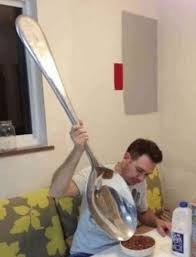

In [48]:
from IPython.display import Image, display

display(Image(filename='./image.png'))

# Submission

In [ ]:
def predict(
    test: pd.DataFrame,
    lag1: pd.DataFrame, 
    lag2: pd.DataFrame,
    lag3: pd.DataFrame,
    lag4: pd.DataFrame,
) -> pd.DataFrame:
    """
    Predicts target values using lag features with neural network.
    Handles empty input and replaces null values with 0.
    """
    # Convert Polars to Pandas if needed
    if hasattr(test, 'to_pandas'):
        test = test.to_pandas()
    if hasattr(lag1, 'to_pandas'):
        lag1 = lag1.to_pandas()
    if hasattr(lag2, 'to_pandas'):
        lag2 = lag2.to_pandas()
    if hasattr(lag3, 'to_pandas'):
        lag3 = lag3.to_pandas()
    if hasattr(lag4, 'to_pandas'):
        lag4 = lag4.to_pandas()
    
    # If no test data, return zeros
    if len(test) == 0:
        return pd.DataFrame(0, index=range(1), columns=ycols)
    
    # Initialize prediction dataframe with date_id
    X_pred = pd.DataFrame(index=test.index)
    X_pred["date_id"] = test["date_id"]
    
    # Add lagged features based on their respective lag periods
    for feature in Features[1:]:  # Skip date_id
        if feature in target_lag_1:
            if feature in lag1.columns and len(lag1) > 0:
                X_pred[feature] = lag1[feature].values
            else:
                X_pred[feature] = 0
        elif feature in target_lag_2:
            if feature in lag2.columns and len(lag2) > 0:
                X_pred[feature] = lag2[feature].values
            else:
                X_pred[feature] = 0
        elif feature in target_lag_3:
            if feature in lag3.columns and len(lag3) > 0:
                X_pred[feature] = lag3[feature].values
            else:
                X_pred[feature] = 0
        elif feature in target_lag_4:
            if feature in lag4.columns and len(lag4) > 0:
                X_pred[feature] = lag4[feature].values
            else:
                X_pred[feature] = 0
        else:
            # Default to lag 1 if not specified
            if feature in lag1.columns and len(lag1) > 0:
                X_pred[feature] = lag1[feature].values
            else:
                X_pred[feature] = 0
    
    # Fill any remaining NaN values with 0
    X_pred = X_pred.fillna(0)
    
    # Ensure we have the correct feature order
    X_pred = X_pred[Features]
    
    # Predict using the best neural network model
    predictions = best_nn_model.predict(X_pred)
    preds_df = pd.DataFrame(predictions, columns=ycols)
    
    return preds_df


In [50]:
import kaggle_evaluation.mitsui_inference_server

inference_server = kaggle_evaluation.mitsui_inference_server.MitsuiInferenceServer(predict)

if os.getenv('KAGGLE_IS_COMPETITION_RERUN'):
    inference_server.serve()
else:
    inference_server.run_local_gateway(('/kaggle/input/mitsui-commodity-prediction-challenge/',))

ModuleNotFoundError: No module named 'polars'

In [ ]:
display(pl.read_parquet('/kaggle/working/submission.parquet'))